## Parte 1 - Preguntas Teóricas
**1. Defina los componentes de las Cadenas de Markov**

Los componentes de las Cadenas de Markov son: estados y transiciones. Los estados son los posibles valores que puede tomar la variable aleatoria en un momento dado. Las transiciones son las posibles formas en las que la variable aleatoria puede cambiar de estado.

**2. Defina por lo menos 3 propiedades de las Cadenas de Markov**

Las Cadenas de Markov tienen las siguientes propiedades: propiedad de Markov, propiedad de transición, propiedad de estado estable, y propiedad de recurrencia. La propiedad de Markov establece que la probabilidad de que la variable aleatoria cambie de estado depende únicamente del estado actual y no de los estados anteriores. La propiedad de transición establece que la probabilidad de que la variable aleatoria cambie de estado es la misma para todos los estados. La propiedad de estado estable establece que la probabilidad de que la variable aleatoria cambie de estado es la misma para todos los estados. La propiedad de recurrencia establece que la probabilidad de que la variable aleatoria cambie de estado es la misma para todos los estados.

**3. ¿Por qué se suele usar procesos de Poisson para simular colas?**

Se suelen usar procesos de Poisson para simular colas porque sirven para modelar eventos que ocurren de forma aleatoria e independiente en un intervalo de tiempo. Por ejemplo, el número de clientes que llegan a una tienda en un intervalo de tiempo dado.

**4. Defina las dos etapas que se suelen emplear para Simulation Optimization**

Las dos etapas que se suelen emplear para Simulation Optimization son: la etapa de simulación y la etapa de optimización. La etapa de simulación consiste en simular el sistema para obtener datos de entrada para la etapa de optimización. La etapa de optimización consiste en optimizar el sistema para obtener los mejores resultados posibles.

## Parte 2 - Pregunta Práctica
Usando lo visto sobre análisis de sensibilidad, use un acercamiento de Análisis de Sensibilidad Global para
responder al siguiente problema. Puede usar herramientas de Inteligencia Artificial (ChatGPT, etc) para resolver esta
parte. Asegúrese de explicar los prompts usados y su lógica en cómo evolucionó. Finalmente, responda las
preguntas que se presentan al final.

Usted tiene la tarea de evaluar una oportunidad de inversión en un determinado horizonte de inversión. La inversión
involucra factores inciertos, como, la tasa de interés y la volatilidad de los rendimientos. Desea analizar cómo las
variaciones en estos factores influyen en el valor actual neto (VAN) de la inversión.
- Número de simulaciones: 1000
- Horizonte de Inversión: 5 años
- Tasa de descuento: 0,1 (utilizado para calcular los flujos de efectivo descontados)
- Variables del problema:
- Tasa de Interés: Rangos de 0.08 a 0.12
- Volatilidad: Rangos de 0.15 a 0.25

In [33]:
from SALib.sample import morris
from SALib.analyze import sobol
import numpy as np
import matplotlib.pyplot as plt

No_simulaciones = 1000
tasa_descuento = 0.1

def simular_vpn():
    horizonte = 5
    flujos_caja = np.random.normal(500000, 100000, horizonte)
    flujos_descontados = [
        flujo / (1 + tasa_descuento)**(i+1)
            for i, flujo in enumerate(flujos_caja)
    ]
    
    return sum(flujos_descontados)


problem = {
    'num_vars': 2,
    'names': ['tasa_interes', 'Volatilidad'],
    'bounds': [
        [0.08, 0.12],
        [0.15, 0.25]
    ]
}

# Sampleo
param_values = morris.sample(problem, No_simulaciones, num_levels=4)
output_values = np.array([simular_vpn() for _ in range(len(param_values))])

# Analisis Sobol
Si = sobol.analyze(problem, output_values, print_to_console=True)

# Print the first-order sensitivity indices
print(Si['S1'])
print(Si['S2'])

                    ST   ST_conf
tasa_interes  0.998852  0.116811
Volatilidad   0.972713  0.124220
                    S1   S1_conf
tasa_interes  0.057158  0.108889
Volatilidad   0.099318  0.107224
                                   S2   S2_conf
(tasa_interes, Volatilidad) -0.168788  0.151234
[0.05715836 0.09931806]
[[        nan -0.16878819]
 [        nan         nan]]


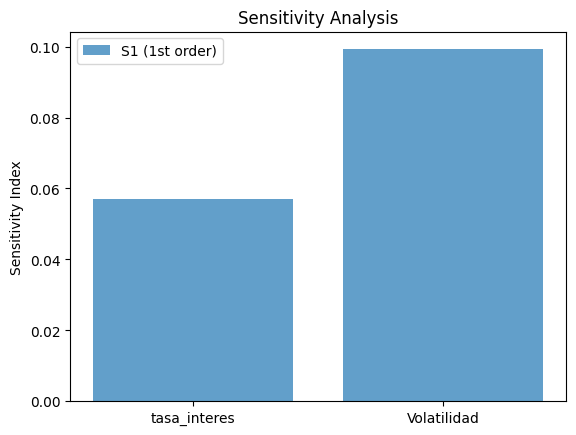

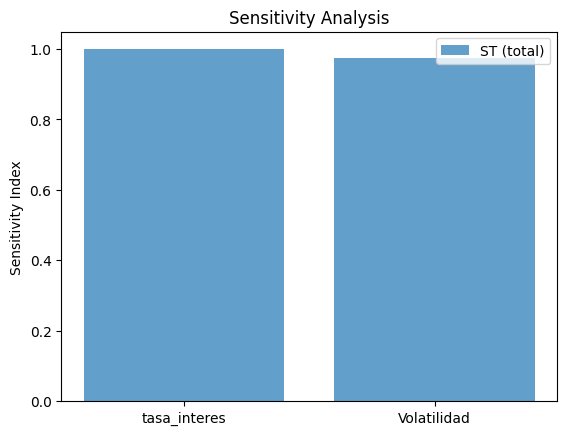

In [34]:
S1 = Si['S1']

# Nombres de las variables
variable_names = problem['names']

# Graficar los índices de sensibilidad
plt.bar(variable_names, S1, label='S1 (1st order)', alpha=0.7)
plt.ylabel('Sensitivity Index')
plt.title('First Order Sensitivity Analysis')
plt.legend()
plt.show()

# Graficar los índices de sensibilidad
ST = Si['ST']
plt.bar(variable_names, ST, label='ST (total)', alpha=0.7)
plt.ylabel('Sensitivity Index')
plt.title('Total Sensitivity Analysis')
plt.legend()
plt.show()

**Preguntas:**
1. ¿Qué tanto influye cada variable en el VPN?
    
    Cada 

2. ¿Qué variable influye más? ¿Por qué cree que es esto?
    

3. ¿Hay una diferencia significativa en la influencia de cada variable? ¿Por qué?
4. Si tuviera que hacer mejoras al análisis ¿qué podría hacer? (Puede usar recursos de internet para esta parte, sí puede usar ChatGPT de nuevo acá)